## Parte 1: Scaricamento dei dati e visualizzazione dei grafici

## Analisi statistica dei rendimenti

FB:
                  High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2012-05-18  45.000000  38.000000  42.049999  38.230000  573576400  38.230000
2012-05-21  36.660000  33.000000  36.529999  34.029999  168192700  34.029999
2012-05-22  33.590000  30.940001  32.610001  31.000000  101786600  31.000000
2012-05-23  32.500000  31.360001  31.370001  32.000000   73600000  32.000000
2012-05-24  33.209999  31.770000  32.950001  33.029999   50237200  33.029999 

GOOGL:
                   High         Low        Open       Close     Volume  \
Date                                                                    
2011-11-30  300.055054  296.341339  299.274261  299.994995  6787206.0   
2011-12-01  308.308319  299.799805  300.300293  307.192200  7233959.0   
2011-12-02  312.312317  308.438446  308.833832  310.490479  8163229.0   
2011-12-05  316.266266  311.511505  314.134125  313.138153  6388605.0   
2011-12-

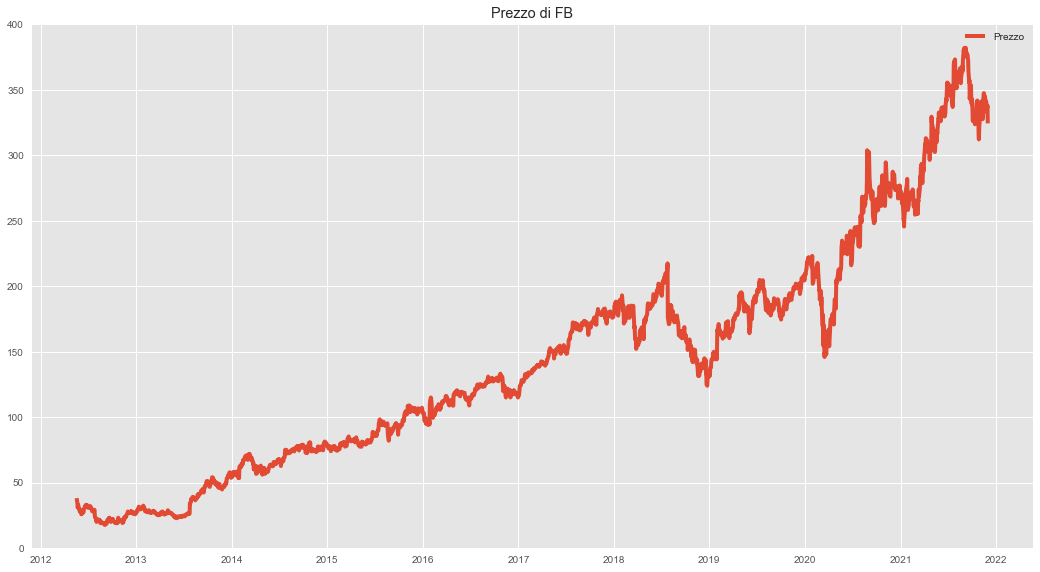

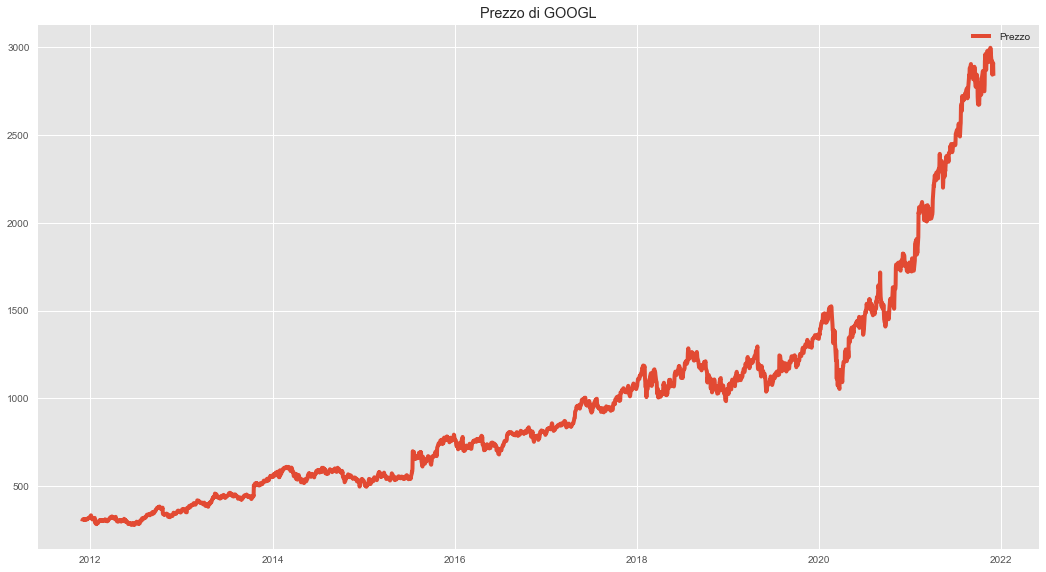

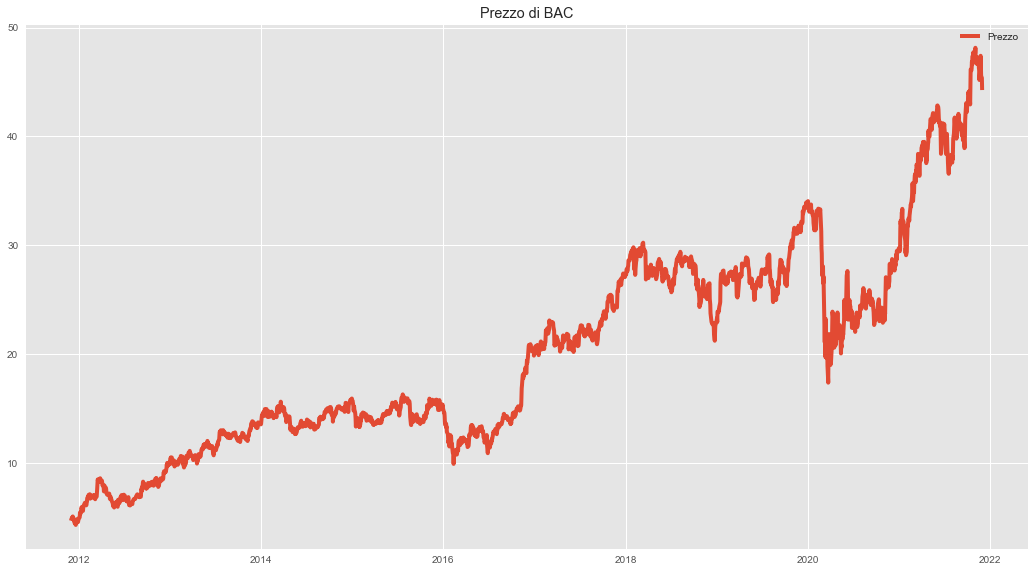

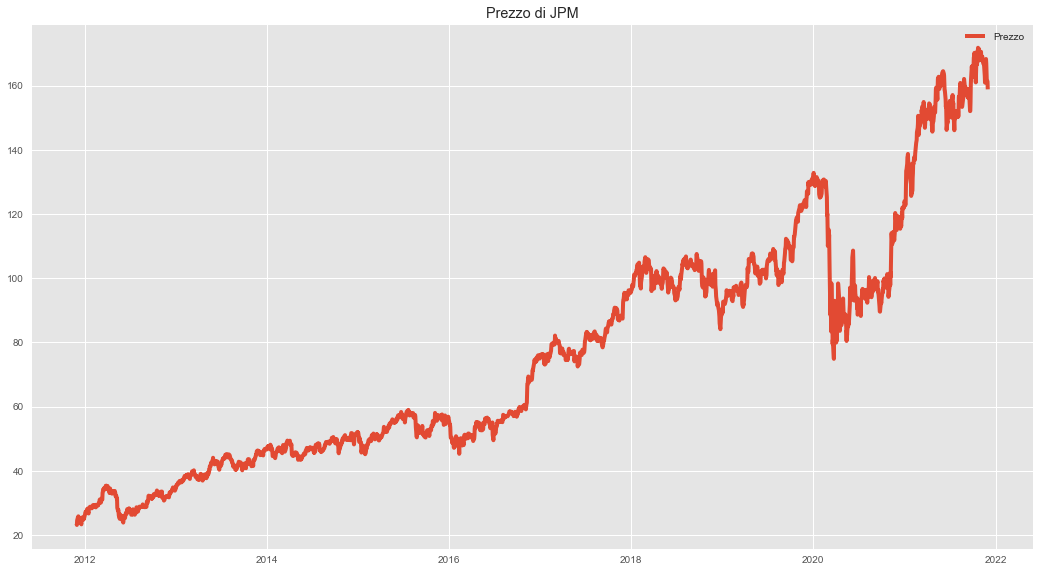

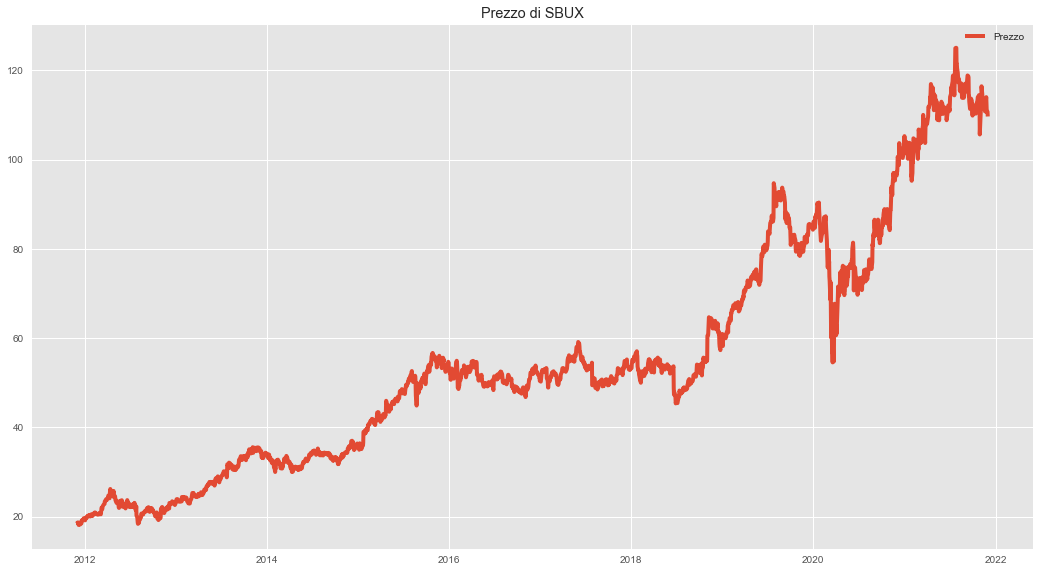

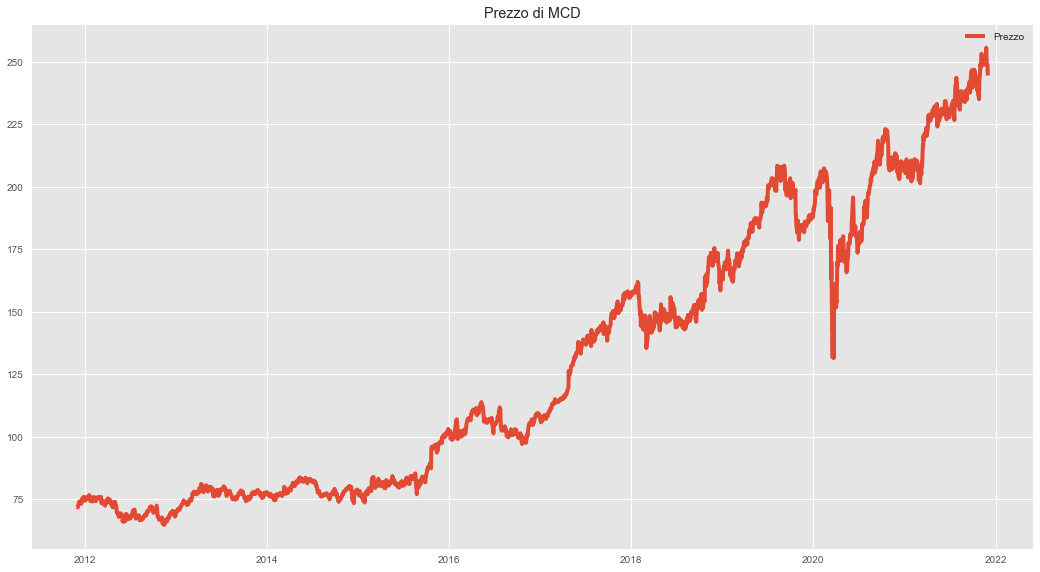

In [312]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import seaborn as sns
plt.style.use('ggplot')

start_date = '2011-11-30'
end_date = '2021-11-30'

tickers = ['FB', 'GOOGL', 'BAC', 'JPM', 'SBUX', 'MCD']

datasets = {}
adj_close_df = {}

for ticker in tickers:
    datasets[ticker] = web.get_data_yahoo(ticker, start_date, end_date)
    adj_close_df[ticker] = datasets[ticker]['Adj Close']
    plt.figure(figsize=(16, 9))
    plt.title('Prezzo di ' + ticker)
    plt.grid(True)
    plt.plot(datasets[ticker]['Adj Close'], label = 'Prezzo')
    plt.legend()
    print(ticker + ':\n', datasets[ticker].head(), '\n')

adj_close_df = pd.DataFrame(adj_close_df)

/Users/gabrielecanesi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/gabrielecanesi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/gabrielecanesi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/gabrielecanesi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWar

===STATISTICHE UNIVARIATE===

FB:
Media: 0.0011565715292664038
Varianza: 0.0005
Deviazione Stamdard: 0.023136006441836207
Asimmetria: 0.928510285952637
Curtosi: 18.433607591719078

GOOGL:
Media: 0.0010187274815106322
Varianza: 0.0003
Deviazione Stamdard: 0.015865244541315767
Asimmetria: 0.5016007699161901
Curtosi: 11.218451681920437

BAC:
Media: 0.0010902380596901741
Varianza: 0.0004
Deviazione Stamdard: 0.01998627786768374
Asimmetria: 0.2647788393703764
Curtosi: 9.153649468957129

JPM:
Media: 0.0009034739480172616
Varianza: 0.0003
Deviazione Stamdard: 0.01697751644267671
Asimmetria: 0.280468739092533
Curtosi: 14.256952513663036

SBUX:
Media: 0.0008329310675286628
Varianza: 0.0002
Deviazione Stamdard: 0.015686894577828615
Asimmetria: -0.007013576132576144
Curtosi: 14.400977749999681

MCD:
Media: 0.0005609242775742403
Varianza: 0.0001
Deviazione Stamdard: 0.01221362392756684
Asimmetria: 0.5369033140272195
Curtosi: 38.5704440095309

           FB   GOOGL     BAC     JPM    SBUX     MCD
F

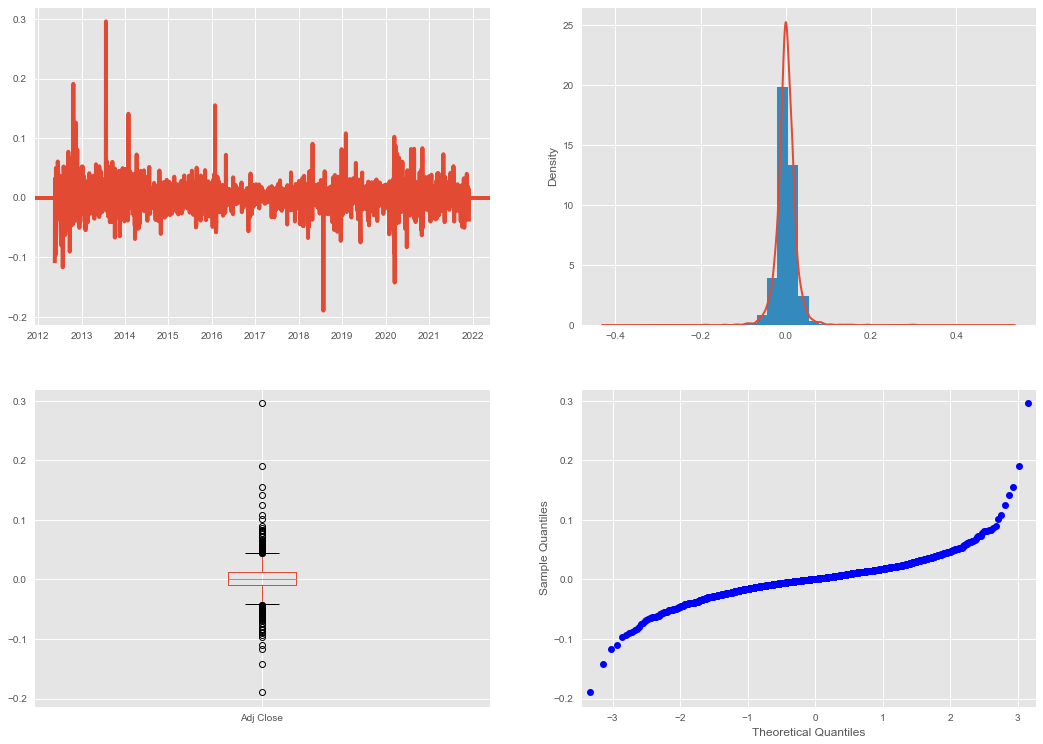

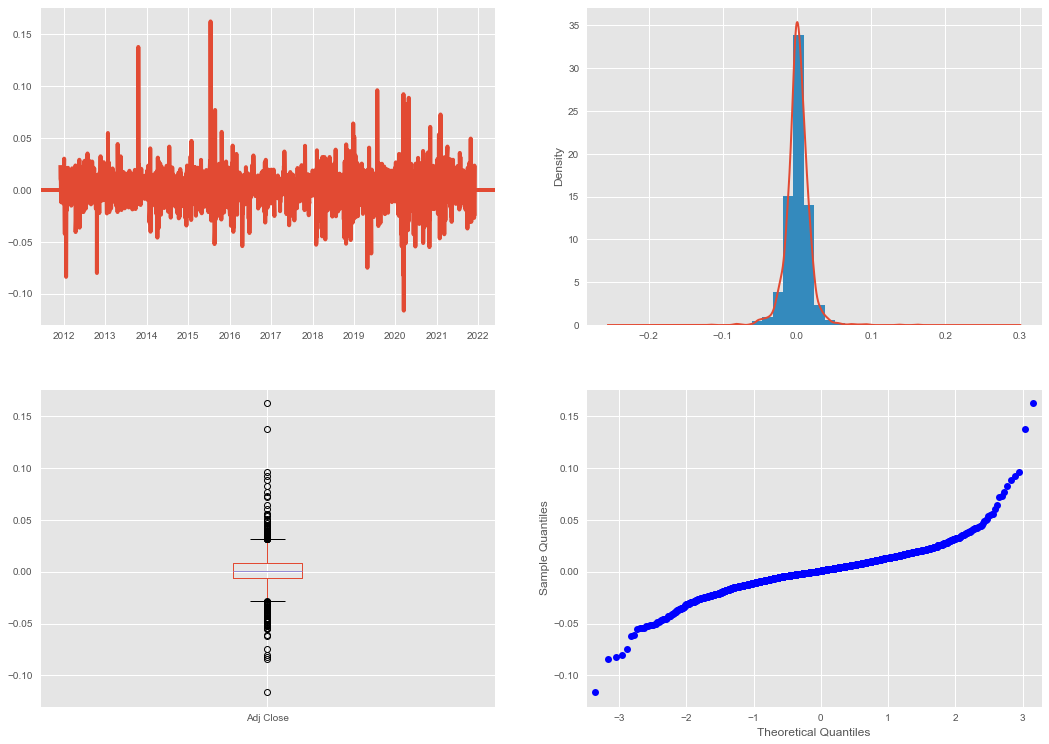

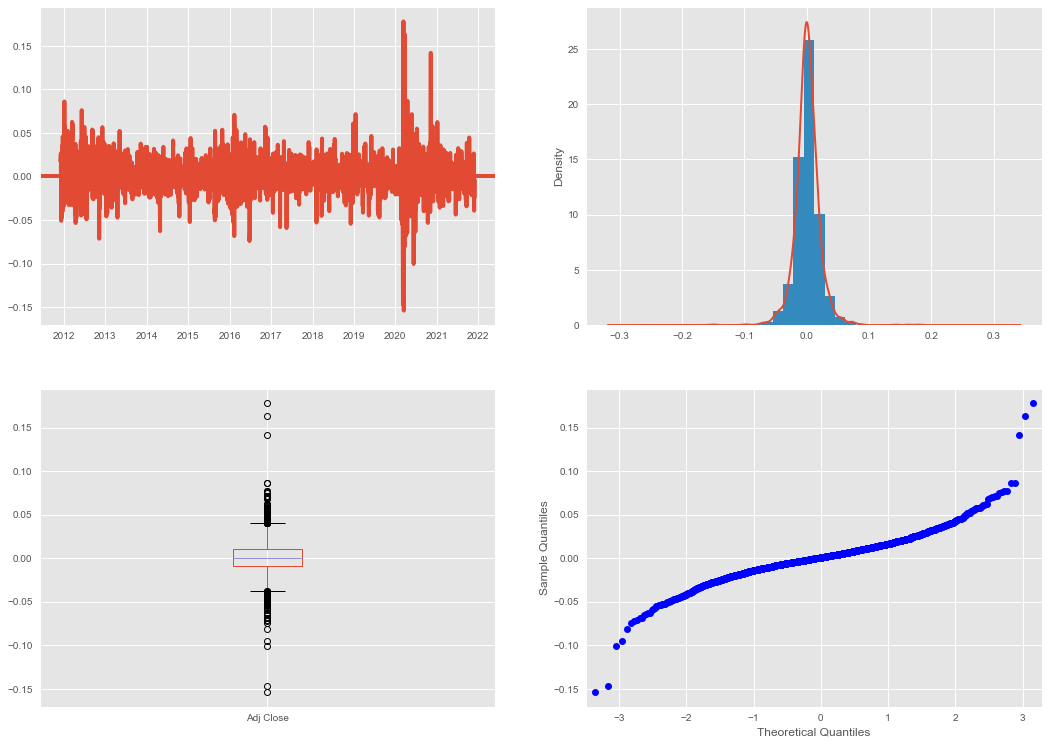

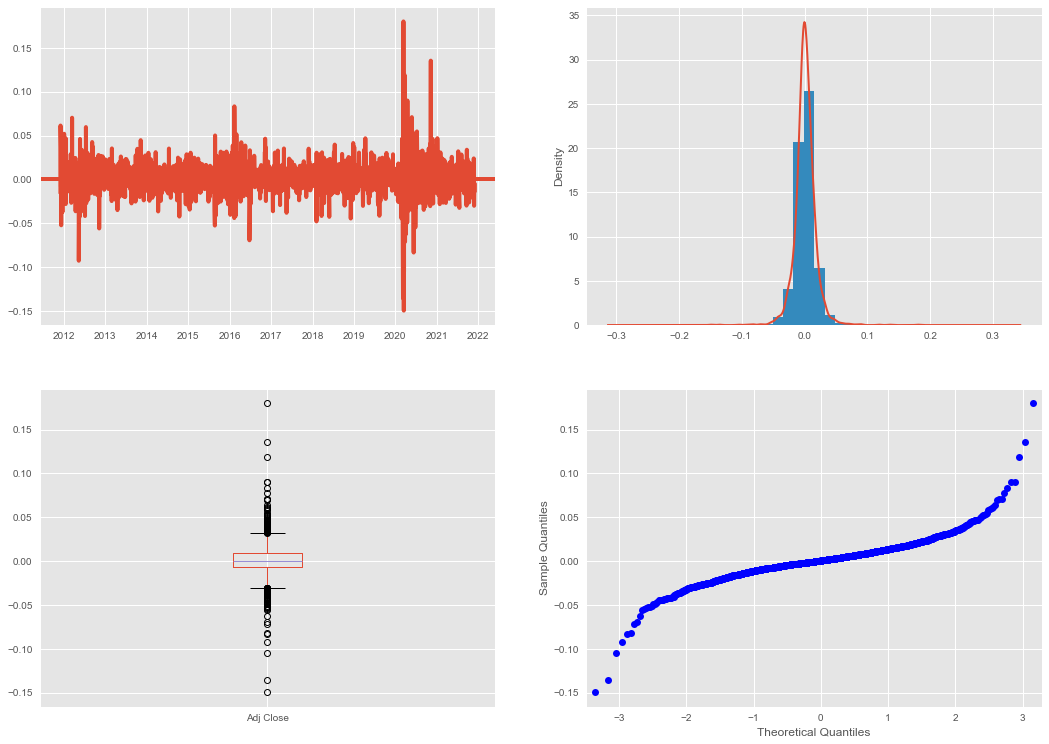

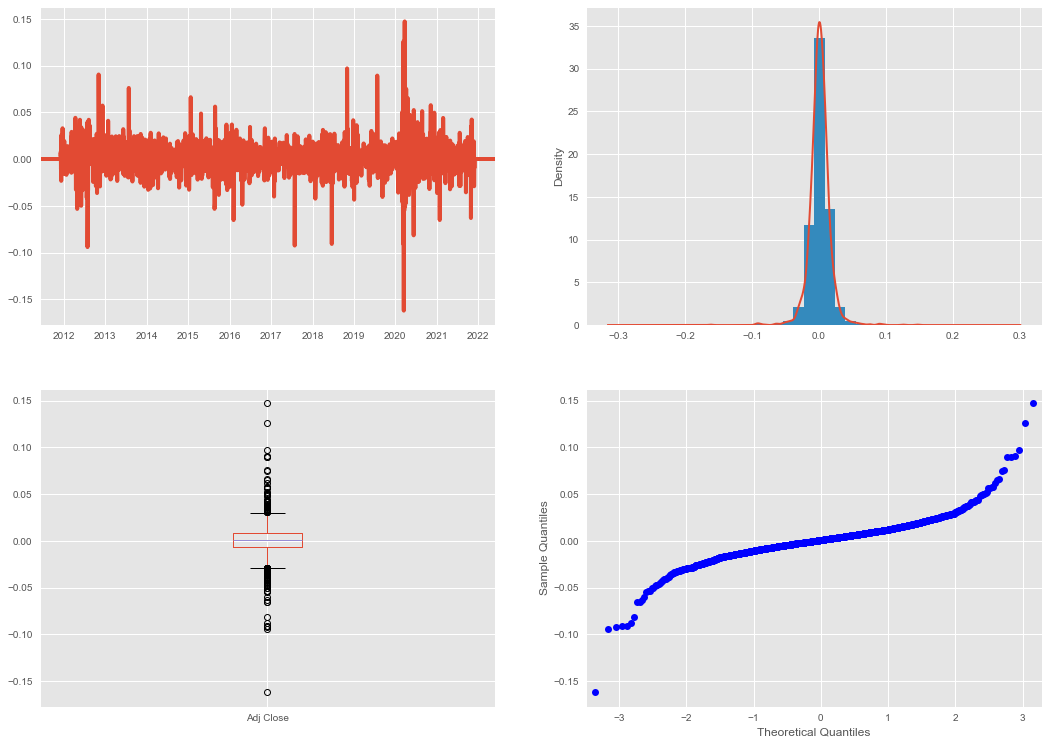

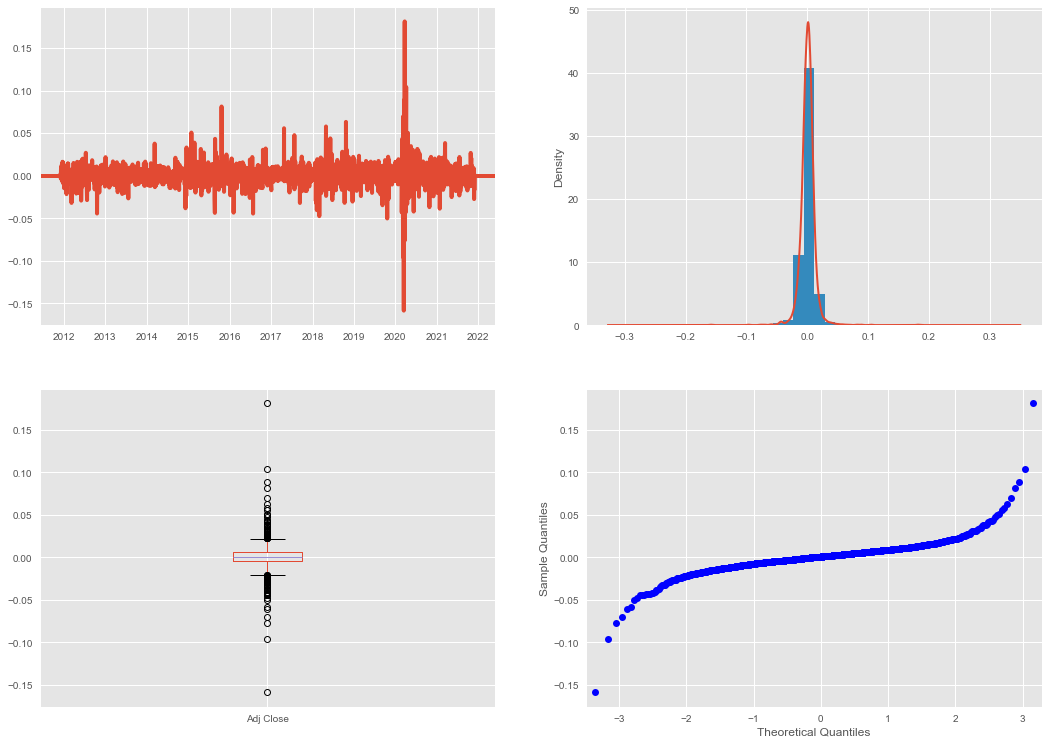

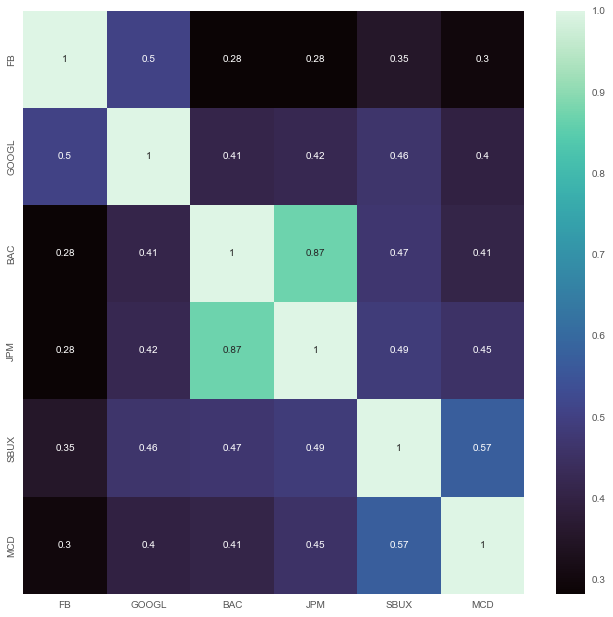

In [325]:
import statsmodels.api as sm

returns = {}
compounded_returns = {}

for ticker in tickers:
    fig, axes = plt.subplots(2, 2, figsize = (16, 12))
    returns[ticker] = datasets[ticker]['Adj Close'] / datasets[ticker]['Adj Close'].shift(1)
    compounded_returns[ticker] = returns[ticker].cumprod()
    returns[ticker] = returns[ticker] - 1
    axes[0][0].plot(returns[ticker])
    axes[0][0].axhline(0)
    returns[ticker].plot.kde(ax = axes[0][1], alpha=1, linewidth=2)
    axes[0][1].hist(returns[ticker], density=True, bins=20)
    returns[ticker].to_frame().boxplot(ax = axes[1][0])
    sm.qqplot(returns[ticker], ax=axes[1][1])

returns = pd.DataFrame(returns)
print('===STATISTICHE UNIVARIATE===\n')
for ticker in tickers:
    print(ticker + ':')
    print('Media: ' + str(returns[ticker].mean()))
    std = returns[ticker].std()
    var = returns[ticker].var()
    print('Varianza: ' + str(np.round(std ** 2, 4)))
    print('Deviazione Stamdard: ' + str(std))
    print('Asimmetria: ' + str(returns[ticker].skew()))
    print('Curtosi: ' + str(returns[ticker].kurtosis()) + '\n')

print(np.round(returns.cov(), 4))
plt.figure(figsize=(10, 10))
sns.heatmap(returns.corr(), annot = True, cmap='mako')
plt.show()


## Previsione con rete neurale

Epoch 1/15
114/114 [==============================] - 0s 1ms/step - loss: 6822.2119 - mape: 72.1029
Epoch 2/15
114/114 [==============================] - 0s 1ms/step - loss: 781.9442 - mape: 24.7993
Epoch 3/15
114/114 [==============================] - 0s 1ms/step - loss: 185.0416 - mape: 12.7744
Epoch 4/15
114/114 [==============================] - 0s 1ms/step - loss: 176.8660 - mape: 12.5641
Epoch 5/15
114/114 [==============================] - 0s 2ms/step - loss: 176.4712 - mape: 12.5527
Epoch 6/15
114/114 [==============================] - 0s 1ms/step - loss: 175.9429 - mape: 12.5336
Epoch 7/15
114/114 [==============================] - 0s 1ms/step - loss: 175.3490 - mape: 12.5086
Epoch 8/15
114/114 [==============================] - 0s 2ms/step - loss: 174.7556 - mape: 12.4846
Epoch 9/15
114/114 [==============================] - 0s 1ms/step - loss: 173.9866 - mape: 12.4525
Epoch 10/15
114/114 [==============================] - 0s 2ms/step - loss: 173.2839 - mape: 12.4268
Epoch 11

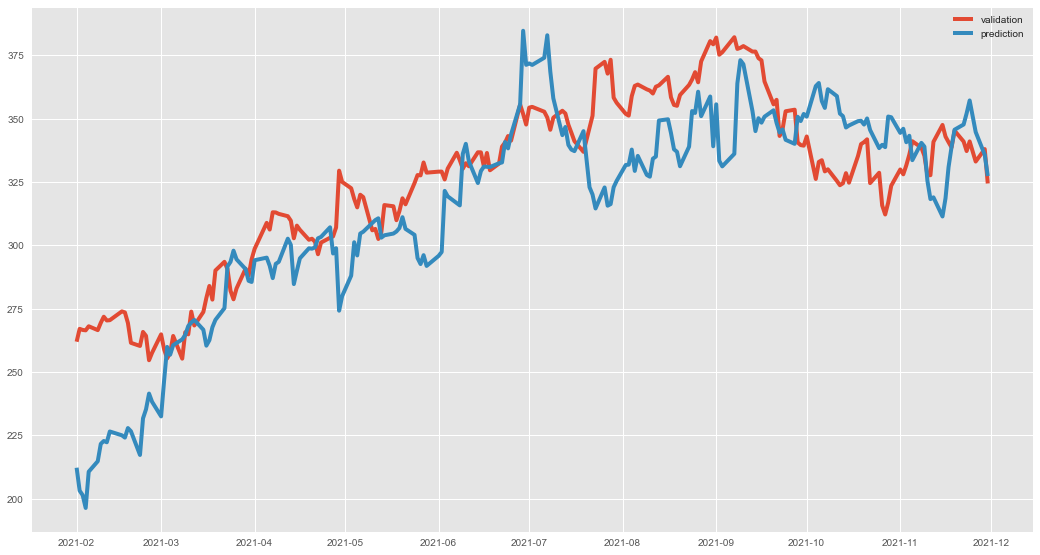

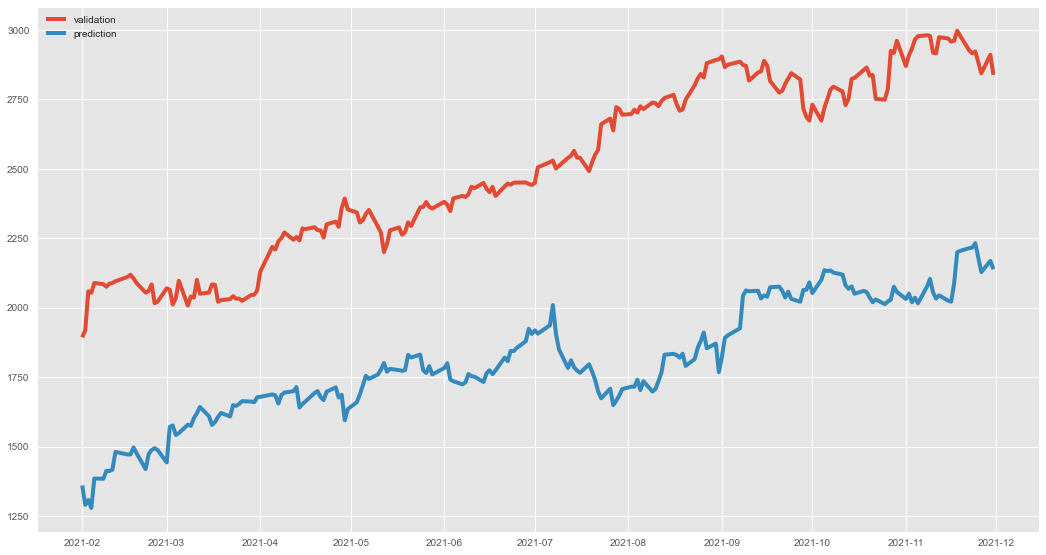

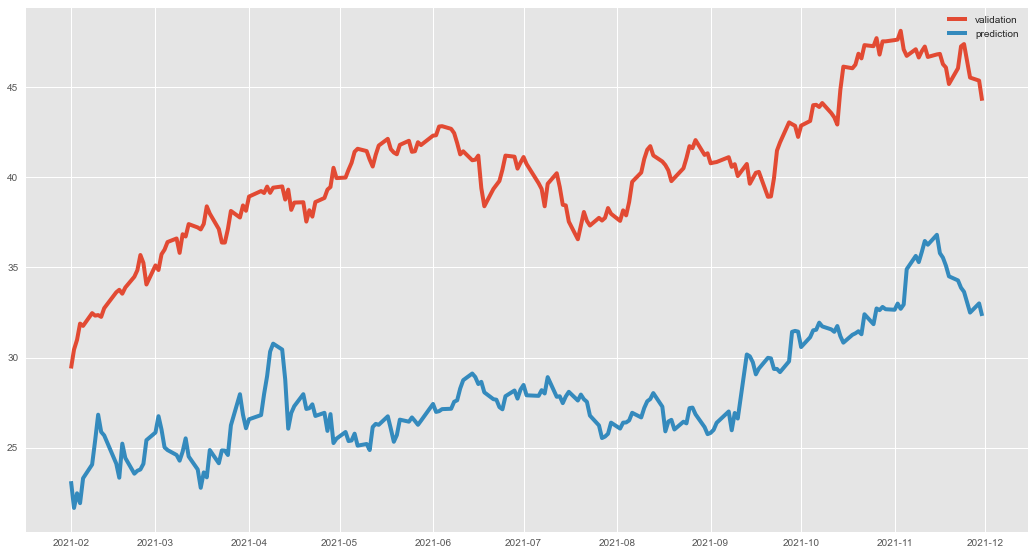

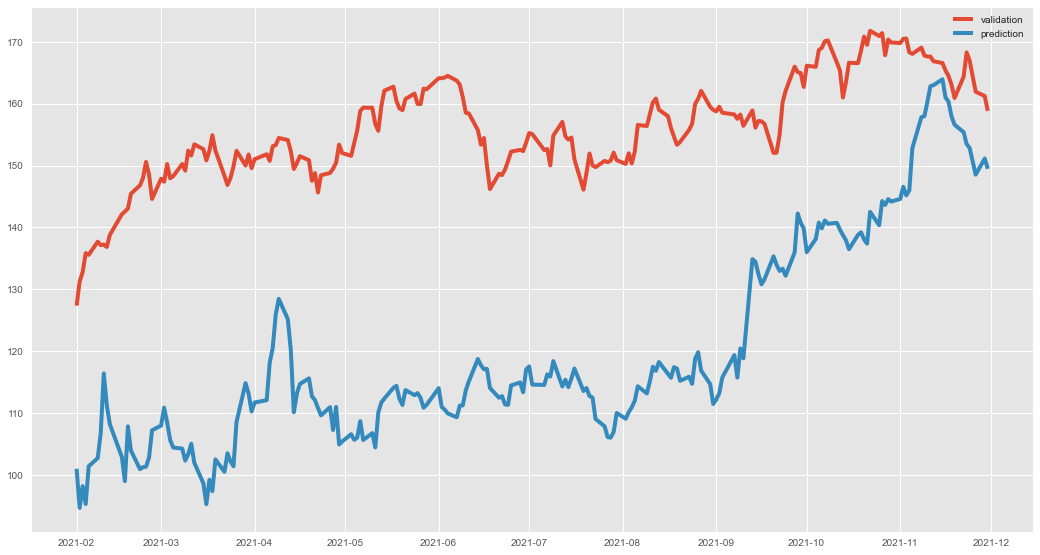

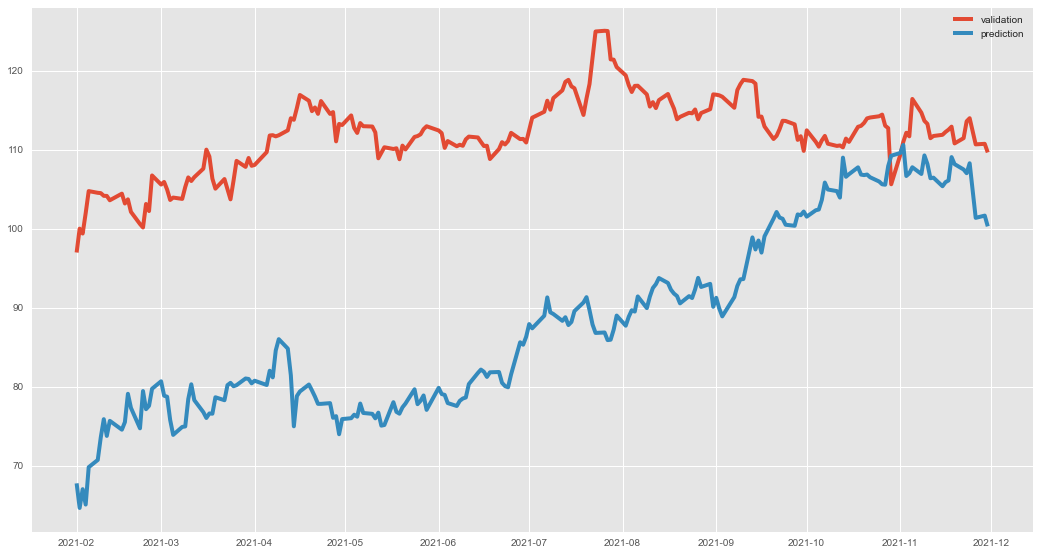

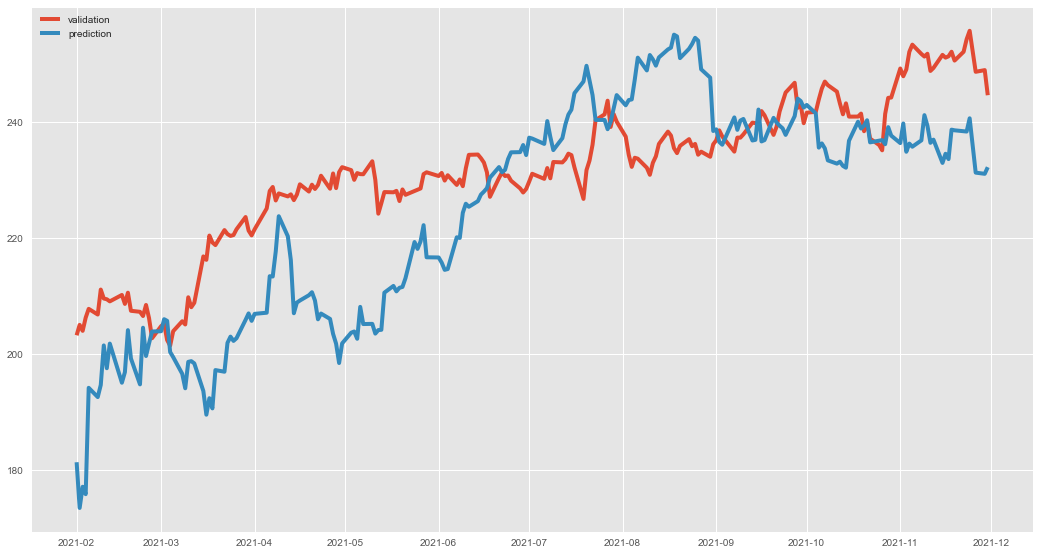

In [314]:
from tensorflow import keras
import sklearn.preprocessing as pre
import tensorflow as tf

val = datasets[tickers[0]].loc['2021-01-31' : '2021-11-30']
#divido i dati in 80 mesi di training, 30 di test, 10 validazione. faccio le proporzioni
predicted = pd.DataFrame(index = adj_close_df.index[adj_close_df.shape[0] - val.shape[0]:])
for ticker in tickers:
    data = datasets[ticker]['Adj Close']
    train = data.loc[start_date : '2018-07-30']
    test = data.loc['2018-07-31':'2021-01-30']
    validation = data.loc['2021-01-31':'2021-11-30']

    window_size = output_size = validation.shape[0]

    best_model = None
    best_scaler = None
    best_scaled_data = None
    best_performance = None

    for i in range(10, 11):
        sc = pre.MinMaxScaler(feature_range=(0, i))
        sc = pre.FunctionTransformer(func=(lambda x: x), inverse_func=(lambda x: x))
        s_data = sc.fit_transform(np.asarray(data).reshape(-1, 1))

        train_inputs = np.asarray([s_data[i:i+window_size] for i in range(0, train.shape[0] - output_size - window_size)]).reshape((train.shape[0] - window_size - output_size, window_size, 1))
        train_outputs = np.asarray([s_data[i + window_size:i + window_size + output_size] for i in range(0, train_inputs.shape[0])]).reshape((train_inputs.shape[0], output_size, 1))

        test_inputs = np.asarray([s_data[i:i+window_size] for i in range(train.shape[0], train.shape[0] + test.shape[0] - output_size - window_size)]).reshape((test.shape[0] - window_size - output_size, window_size, 1))
        test_outputs = np.asarray([s_data[i + window_size : i + window_size + output_size] for i in range(train.shape[0], train.shape[0] + test_inputs.shape[0])]).reshape((test_inputs.shape[0], output_size, 1))

        model = keras.Sequential([
            keras.layers.Dense(50, activation = 'relu'),
            keras.layers.Dense(1)
        ])

        model.compile(
            optimizer = keras.optimizers.Adam(),
            loss='mse',
            metrics = ['mape']
        )

        model.fit(train_inputs, train_outputs, epochs = i + 5, batch_size=i)

        performance = model.evaluate(test_inputs, test_outputs)
        print(performance)

        if best_performance is None or performance[1] < best_performance[1]:
            best_model = model
            best_scaler = sc
            best_scaled_data = s_data
            best_performance = performance

    predictions = pd.DataFrame(best_scaler.inverse_transform(best_model.predict(np.asarray(best_scaled_data[data.shape[0] - validation.shape[0] - window_size : data.shape[0] - validation.shape[0]]).reshape(1, window_size, 1))[0]).reshape(output_size), index=adj_close_df.index[adj_close_df.shape[0] - output_size:])


    predicted[ticker] = predictions

    plt.figure(figsize=(16, 9))
    plt.plot(validation, label = 'validation')
    plt.plot(predictions, label = 'prediction')
    plt.legend()

In [240]:

predictions

,0
Date,
2021-02-01,180.685883
2021-02-02,172.847382
2021-02-03,176.482788
2021-02-04,175.205521
2021-02-05,193.447891
...,...
2021-11-23,237.403076
2021-11-24,239.671494
2021-11-26,230.353088


### Alternativa con ARIMA (Scarsa)

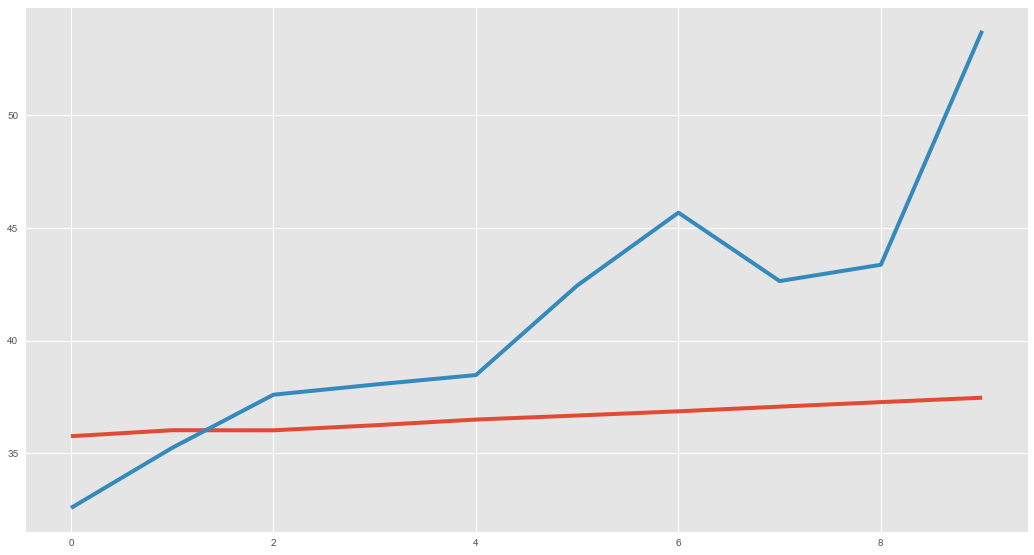

In [311]:
from pmdarima import auto_arima

t = train.resample('M').last()
te = test.resample('M').last()
v = validation.resample('M').last()

arima_model = auto_arima(np.concatenate([np.asarray(t).reshape(len(t)), np.asarray(te).reshape(len(te))]), start_p = 0, start_q = 0, max_p = 10, max_q = 10, max_d = 10, start_P=0, start_Q=0, start_D = 1, n_fits=100, seasonal=True, n=12)

plt.figure(figsize=(16, 9))
pr = arima_model.predict(n_periods=v.shape[0])
plt.plot(pr)
plt.plot(np.asarray(v))


## Capital Asset Pricing Model

In [298]:
## Scarico i dati di S&P 500
import pandas_datareader as web

def beta(returns, benchmark, start, end):
    temp_df = pd.DataFrame()
    temp_df['Ret'] = returns.loc[start:end]
    temp_df['Benchmark'] = benchmark.loc[start:end]
    cm = temp_df.cov()
    return cm['Ret']['Benchmark'] / cm['Benchmark']['Benchmark']


betas = {}
sp500 = web.get_data_yahoo('^GSPC', start_date, end_date)
adj_close_df['Benchmark'] = sp500['Adj Close']

cov_mat = adj_close_df.resample('M').last().pct_change().dropna().cov()

for ticker in tickers:
    betas[ticker] = cov_mat[ticker]['Benchmark'] / cov_mat['Benchmark']['Benchmark']

print(betas)

#Fama-French
#Ottengo il dataframe pulito
factors = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows = 3)
factors = factors[factors.index < factors[factors.iloc[:, 0] == " Annual Factors: January-December "].index[0]]
factors.columns = ['Date', 'MKT', 'SMB', 'HML', 'RF']
factors['Date'] = pd.to_datetime(factors['Date'], format = '%Y%m').dt.strftime('%Y-%m')
factors = factors.set_index('Date')
factors = factors[start_date : end_date]

print(factors)

{'FB': 1.1148840910254991, 'GOOGL': 1.0428492227955568, 'BAC': 1.4312787132765425, 'JPM': 1.1589087721485656, 'SBUX': 0.8010383134956817, 'MCD': 0.6097680967072909}
              MKT       SMB       HML        RF
Date                                           
2011-12      0.74     -0.60      1.61      0.00
2012-01      5.05      2.06     -0.94      0.00
2012-02      4.42     -1.86      0.43      0.00
2012-03      3.11     -0.66      1.12      0.00
2012-04     -0.85     -0.41     -0.77      0.00
...           ...       ...       ...       ...
2021-06      2.75      1.80     -7.76      0.00
2021-07      1.27     -3.96     -1.75      0.00
2021-08      2.90     -0.48     -0.13      0.00
2021-09     -4.37      0.80      5.09      0.00
2021-10      6.65     -2.28     -0.45      0.00

[119 rows x 4 columns]


In [299]:
import statsmodels.formula.api as smf

y = adj_close_df[tickers[0]].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'RTN'

ff_data = factors.join(y)
for col in ff_data.columns:
    ff_data[col] = ff_data[col].astype('float')

ff_data['excess'] = ff_data['RTN'] - ff_data['RF']

print(ff_data)
ff_model = smf.ols(formula='excess ~ MKT + SMB + HML', data=ff_data).fit()
print(ff_model.summary())

          MKT   SMB   HML   RF       RTN    excess
Date                                              
2011-12  0.74 -0.60  1.61  0.0       NaN       NaN
2012-01  5.05  2.06 -0.94  0.0       NaN       NaN
2012-02  4.42 -1.86  0.43  0.0       NaN       NaN
2012-03  3.11 -0.66  1.12  0.0       NaN       NaN
2012-04 -0.85 -0.41 -0.77  0.0       NaN       NaN
...       ...   ...   ...  ...       ...       ...
2021-06  2.75  1.80 -7.76  0.0  0.057737  0.057737
2021-07  1.27 -3.96 -1.75  0.0  0.024704  0.024704
2021-08  2.90 -0.48 -0.13  0.0  0.064777  0.064777
2021-09 -4.37  0.80  5.09  0.0 -0.105409 -0.105409
2021-10  6.65 -2.28 -0.45  0.0 -0.046613 -0.046613

[119 rows x 6 columns]
                            OLS Regression Results                            
Dep. Variable:                 excess   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     7.8

## Strategia di trading con backtesting

In [225]:
import itertools as it

best_strategies = {}
best_parameters = {}

for ticker in tickers:
    print(ticker)
    #creo la strategia di tradind e calcolo il rendimento
    sma1 = range(20, 61, 4)
    sma2 = range(180, 281, 10)
    best_strategies[ticker] = pd.DataFrame()
    best_parameters[ticker] = {'SMA': (None, None), 'EWM' : (None, None)}

    for s1, s2 in it.product(sma1, sma2):
        ma1 = datasets[ticker]['Adj Close'].rolling(s1).mean()
        ma2 = datasets[ticker]['Adj Close'].rolling(s2).mean()
        ewm1 = datasets[ticker]['Adj Close'].ewm(span = s1, adjust = False).mean()
        ewm2 = datasets[ticker]['Adj Close'].ewm(span = s2, adjust = False).mean()

        invested_sma = [1 if ma1.loc[i] > ma2.loc[i] else 0 for i in datasets[ticker].index]
        invested_ewm = [1 if ewm1.loc[i] > ewm2.loc[i] else 0 for i in datasets[ticker].index]


        sma_returns = (datasets[ticker]['Adj Close'].pct_change() + 1)
        ewm_returns = (datasets[ticker]['Adj Close'].pct_change() + 1)

        for i in range(len(invested_sma)):
            if invested_sma[i] == 0:
                sma_returns.iloc[i] = 1
            if invested_ewm[i] == 0:
                ewm_returns.iloc[i] = 1

        sma_returns = sma_returns.cumprod()
        ewm_returns = ewm_returns.cumprod()

        if not 'SMA_Returns' in best_strategies[ticker] or best_strategies[ticker]['SMA_Returns'].iloc[-1] < sma_returns.iloc[-1]:
            best_strategies[ticker]['SMA_Returns'] = sma_returns
            best_strategies[ticker]['Invested_SMA'] = invested_sma
            best_parameters[ticker]['SMA'] = (s1, s2)

        if not 'EWM_Returns' in best_strategies[ticker] or best_strategies[ticker]['EWM_Returns'].iloc[-1] < ewm_returns.iloc[-1]:
            best_strategies[ticker]['EWM_Returns'] = ewm_returns
            best_strategies[ticker]['Invested_EWM'] = invested_ewm
            best_parameters[ticker]['EWM'] = (s1, s2)

FB
GOOGL
BAC
JPM
SBUX
MCD


In [300]:
print(best_parameters)

{'FB': {'SMA': (20, 280), 'EWM': (20, 190)}, 'GOOGL': {'SMA': (60, 240), 'EWM': (52, 280)}, 'BAC': {'SMA': (24, 180), 'EWM': (24, 280)}, 'JPM': {'SMA': (24, 210), 'EWM': (20, 210)}, 'SBUX': {'SMA': (20, 180), 'EWM': (24, 180)}, 'MCD': {'SMA': (20, 280), 'EWM': (24, 240)}}


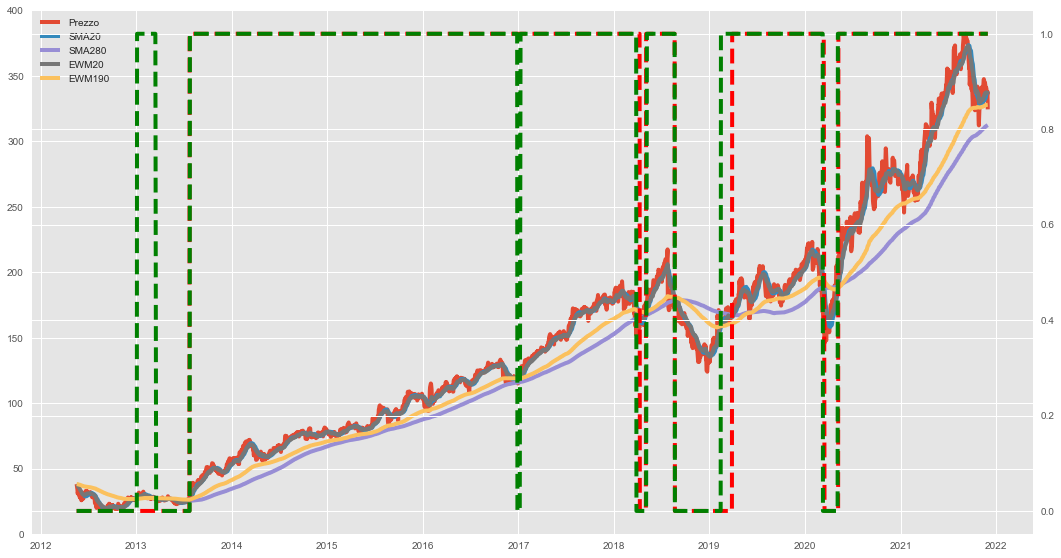

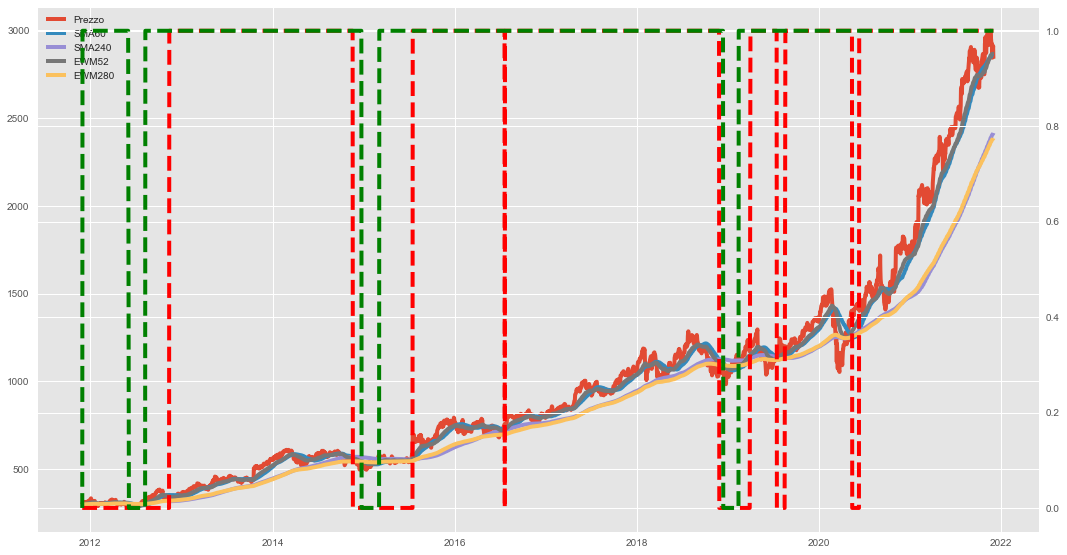

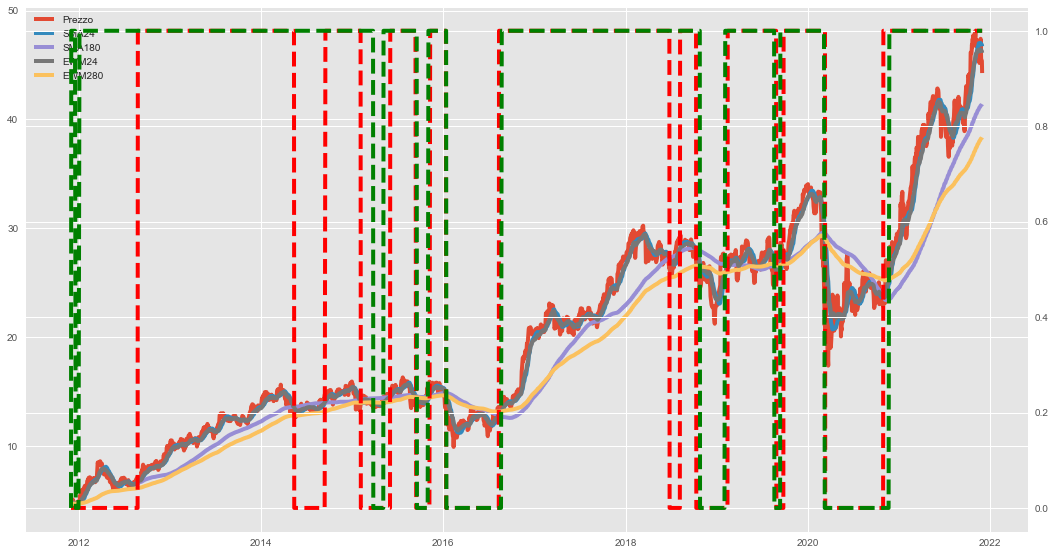

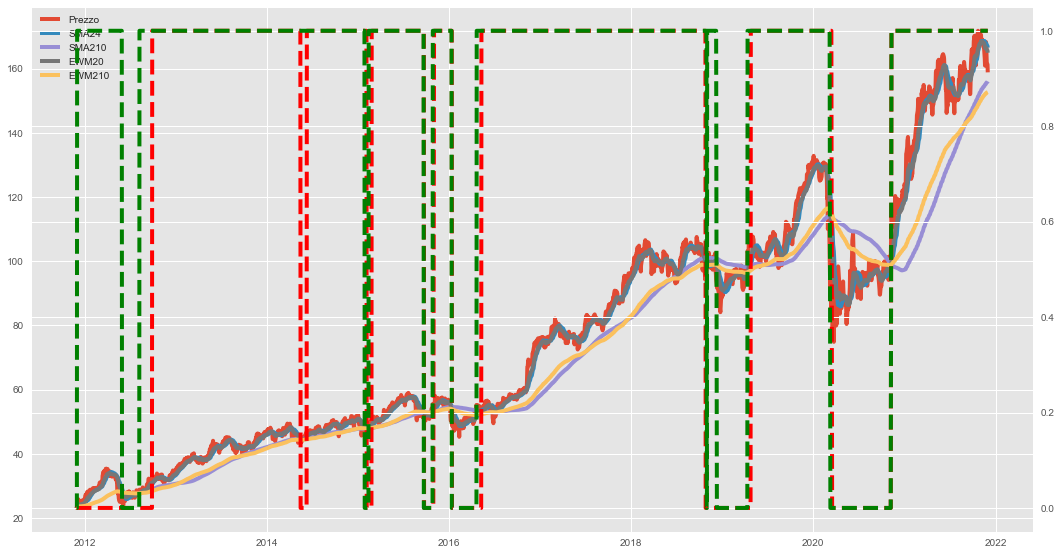

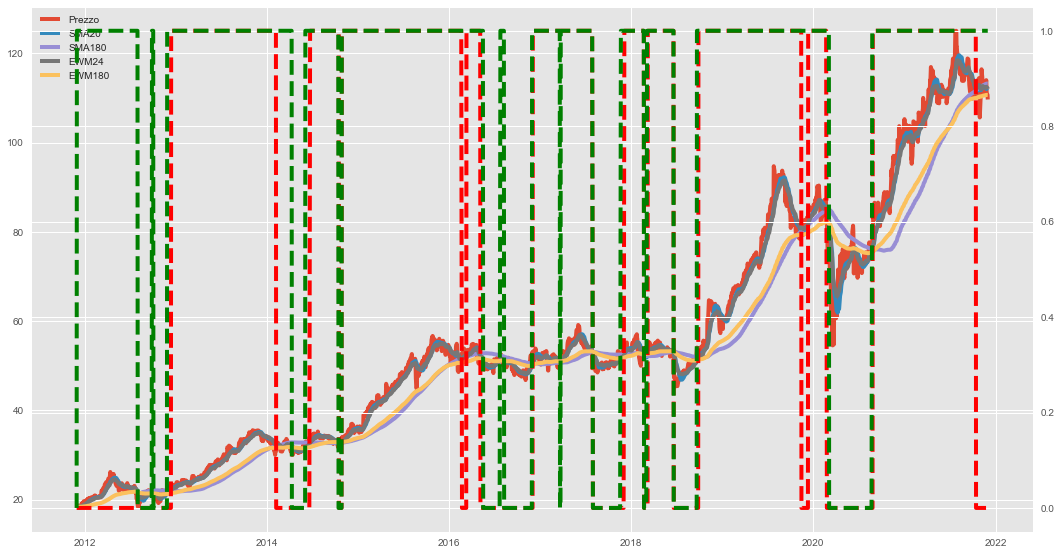

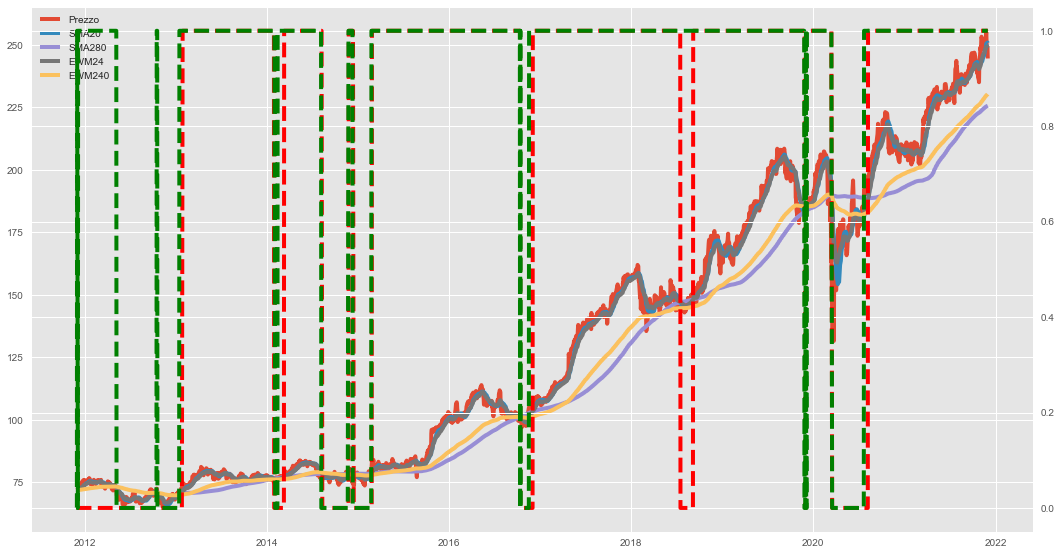

In [301]:
#Creo un grafico delle migliori strategie
for ticker in tickers:
    data = datasets[ticker]['Adj Close']
    #plt.plot(best_strategies[ticker]['SMA_Returns'])
    fig, ax1 = plt.subplots(figsize = (16, 9))
    ax2 = ax1.twinx()
    ax1.plot(data, label = 'Prezzo')
    ax1.plot(data.rolling(best_parameters[ticker]['SMA'][0]).mean(), label = 'SMA' + str(best_parameters[ticker]['SMA'][0]))
    ax1.plot(data.rolling(best_parameters[ticker]['SMA'][1]).mean(), label = 'SMA' + str(best_parameters[ticker]['SMA'][1]))
    ax1.plot(data.ewm(span = best_parameters[ticker]['EWM'][0], adjust = False).mean(), label = 'EWM' + str(best_parameters[ticker]['EWM'][0]))
    ax1.plot(data.ewm(span = best_parameters[ticker]['EWM'][1], adjust = False).mean(), label = 'EWM' + str(best_parameters[ticker]['EWM'][1]))
    ax2.plot(best_strategies[ticker]['Invested_SMA'], color = 'r', linestyle = 'dashed', label = 'SMA Strategy')
    ax2.plot(best_strategies[ticker]['Invested_EWM'], color = 'g', linestyle = 'dashed', label = 'EWM Strategy')
    ax1.legend()

## Ottimizzazione di portafoglio


In [302]:
import numpy as np
import scipy.optimize as sco
for p in predicted:
    predicted[p] = np.asarray(predicted[p]).reshape(predicted[p].shape[0])

predicted
expected_returns = {}

data = adj_close_df['2019-11-30':'2020-12-01'].resample('M').last().pct_change().dropna()

def volatility(w, rets, mat):
    return np.sqrt(np.dot(w.T, np.dot(mat, w)))

def frontiera_efficiente_analitico(ritorni, cov_mat, range_ritorni):
    portafogli_efficienti = []
    bounds = tuple((0, 1) for i in range(len(ritorni)))
    initial_guess = len(ritorni) * [1 / len(ritorni),]

    for ret in range_ritorni:
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(ritorni * x) - ret},
                      {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

        efficient_portfolio = sco.minimize(volatility,
                                           x0 = initial_guess,
                                           args= (ritorni, cov_mat), method='SLSQP',
                                           constraints=constraints,
                                           bounds=bounds)

        portafogli_efficienti.append(efficient_portfolio.x)
    return portafogli_efficienti

## calcolo i ritorni attesi dal mese 109 in avanti basandomi sul forecasting
n = 12
expected_returns = pd.DataFrame()
for ticker in tickers:
    expected_returns[ticker] = np.asarray(predicted[ticker])

expected_returns.index = datasets[tickers[0]].index[datasets[tickers[0]].shape[0] - expected_returns.shape[0]:]

expected_returns = expected_returns.resample('M').last().pct_change().dropna()
predicted_df = pd.DataFrame(predicted)

p_returns = expected_returns.mean() * n
r_returns = data.mean() * n

frontiera_previsioni = frontiera_efficiente_analitico(p_returns, expected_returns.cov() * n, np.linspace(0, 1, 200))
frontiera_passati = frontiera_efficiente_analitico(r_returns, data.cov() * n, np.linspace(-0.2, 1, 200))



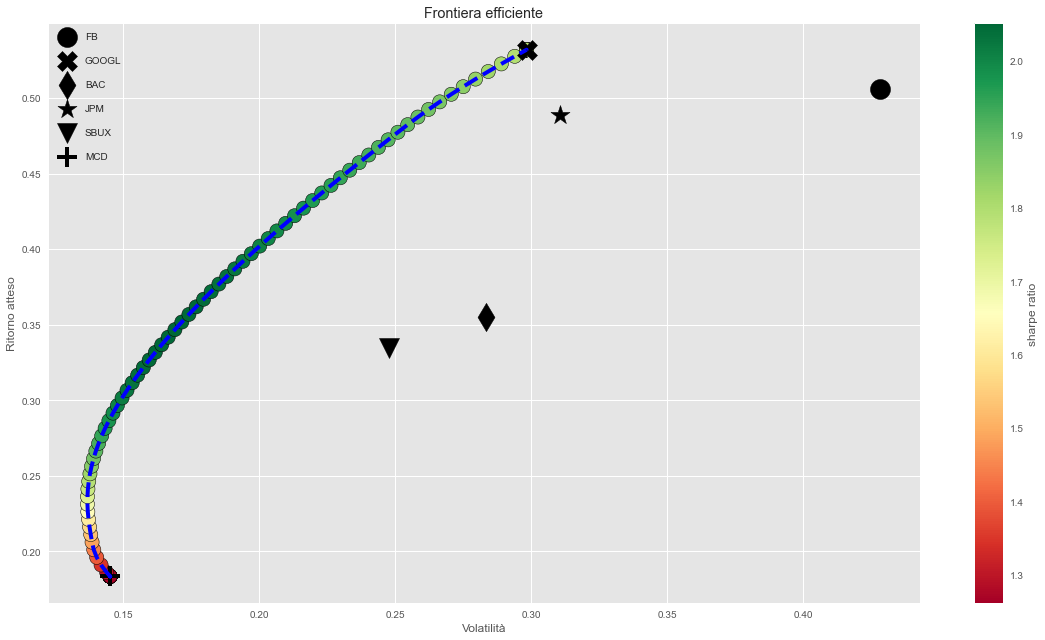

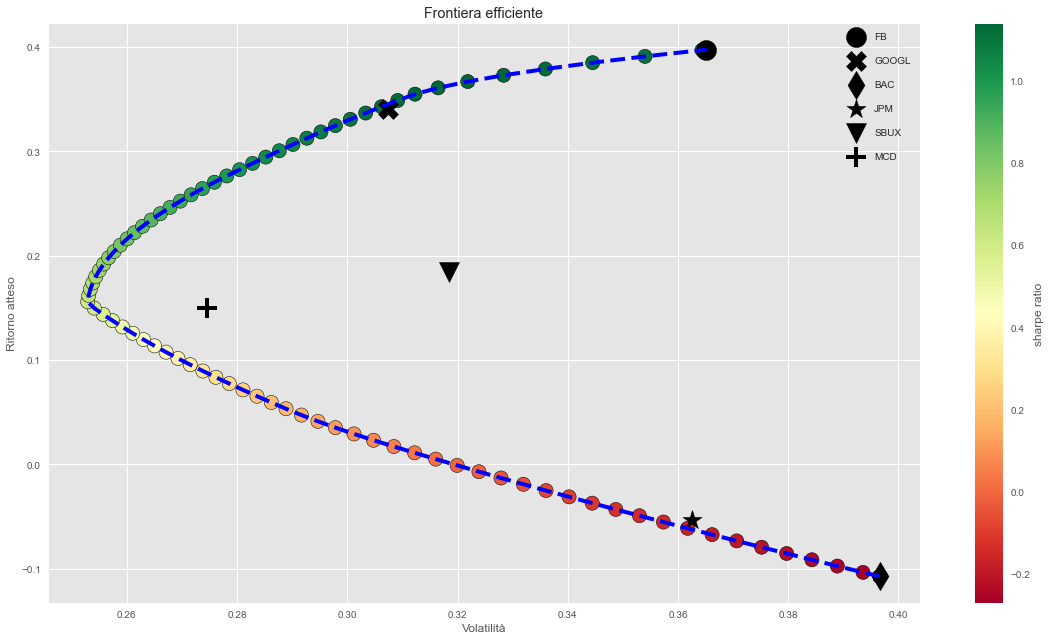

In [303]:
def sharpe_ratio(w, ritorni, m, risk_free):
    portf_returns = np.sum(ritorni * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(m, w)))
    return (portf_returns - risk_free) / portf_volatility


def get_portfolio_results(frontier, exp_rets, return_list, n):
    weights = []
    rets = []
    volatilities = []
    sr = []

    for p in frontier:
        ret = np.sum(p * return_list)
        vol = np.sqrt(np.dot(p.T, np.dot(exp_rets.cov() * n, p)))
        s_r = ret / vol
        rets.append(ret)
        weights.append(p)
        volatilities.append(vol)
        sr.append(s_r)

    result = pd.DataFrame({'weights': weights, 'returns' : rets, 'volatility': volatilities, 'sharpe ratio': sr})
    return result


def plot_frontier(result, tickers, ret_list, expected_returns, n):
    MARKS = ['o', 'X', 'd', '*', 'v', '+']

    fig, ax = plt.subplots(figsize = (16, 9))
    result.plot(kind='scatter', x='volatility', s = 200,
                          y='returns', c='sharpe ratio',
                          cmap='RdYlGn', edgecolors='black',
                          ax=ax)
    ax.set(xlabel='Volatilità',
           ylabel='Ritorno atteso',
           title='Frontiera efficiente')
    ax.plot(result['volatility'], result['returns'], 'b--')

    for asset_index in range(6):
        ax.scatter(x=np.sqrt((ret_list.cov() * n).iloc[asset_index, asset_index]),
                   y=expected_returns[asset_index],
                   marker=MARKS[asset_index],
                   s=400,
                   color='black',
                   label=tickers[asset_index],
                   )
    ax.legend(labelspacing = 1.5)

    plt.tight_layout()
    plt.show()

a = get_portfolio_results(frontiera_previsioni, expected_returns, p_returns, n)
b = get_portfolio_results(frontiera_passati, data, r_returns, n)

plot_frontier(a, tickers, expected_returns, p_returns, n)
plot_frontier(b, tickers, data, r_returns, n)

In [288]:
# Cerco i portafogli che massimizzano lo Sharpe Ratio

best_pred_portfolio = a.iloc[a['sharpe ratio'].idxmax()]
best_past_portfolio = b.iloc[b['sharpe ratio'].idxmax()]

print(best_past_portfolio['sharpe ratio'], np.round(best_past_portfolio['weights'], 3))
print(best_pred_portfolio['sharpe ratio'], np.round(best_pred_portfolio['weights'], 3))


beta_past_portfolio = 0
beta_pred_portfolio = 0
for i in range(0, len(tickers)):
    beta_past_portfolio += best_past_portfolio['weights'][i] * beta(datasets[tickers[i]]['Adj Close'].pct_change(), adj_close_df['Benchmark'].pct_change(), '2019-12-01', '2020-11-30')
    beta_pred_portfolio += best_pred_portfolio['weights'][i] * beta(datasets[tickers[i]]['Adj Close'].pct_change(), adj_close_df['Benchmark'].pct_change(), '2021-01-30', '2021-11-30')

print(beta_past_portfolio, beta_pred_portfolio)

1.1400679064061114 [0.361 0.639 0.    0.    0.    0.    0.   ]
2.0511816983802227 [0.    0.385 0.    0.034 0.09  0.491]
0.9663507969194441 0.9021270666235657


In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime
import pandas as pd

start_date = '2009-9-29'
end_date = '2021-12-09'
#end_date = datetime.today()
future_days = 211
df = datasets[tickers[0]][:'2021-01-30']
df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
y = np.array(df[str(future_days) + '_Day_Price_Forecast'])
y = y[:-future_days]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=30/110)


gamma = 0.00000001

svr_rbf_confidence = 0
svr_rbf = SVR(kernel='linear', C=1000, gamma=gamma)
svr_rbf.fit(x_train, y_train)
x_f = svr_rbf.predict(df[['Close']].iloc[df.shape[0] - future_days : df.shape[0]])
#svm_prediction = np.append(df['Close'].iloc[df.shape[0] - x_test.shape[0]: df.shape[0]], x_f)
svr_rbf_confidence = svr_rbf.score(x_test, y_test)

#minimo = svm_prediction.min()
#massimo = svm_prediction.max()

print(svr_rbf_confidence)

#full_pred = svm_prediction

<ipython-input-28-d775edb8e21a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)


0.8433724426556841


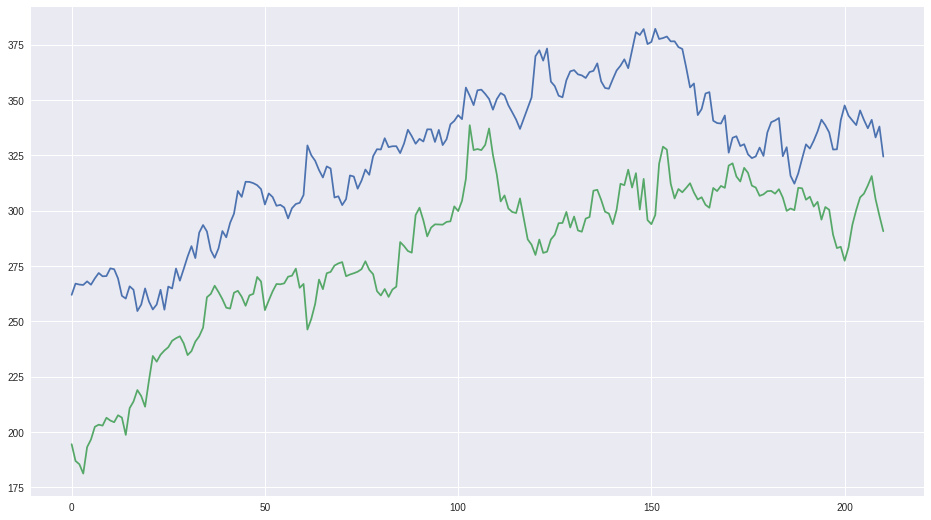

In [117]:
plt.figure(figsize=(16, 9))
plt.plot(np.asarray(datasets[tickers[0]]['Adj Close']['2021-01-31':]))
plt.plot(x_f)